#                                    Admissions Machine Learning Predictions


### 1. Introduction

#### 1.1. This page deals with data concering admissions records for 400 applications from UCLA. 
#### 1.2. The objective here is to (1) explore and analyze the data, (2) preprocess the data, and then (3) run machine learning algorithms to make some prediction models.

### 2. Import your Data:

#### 2.1. Import the necessary preliminary libraries:

In [2]:
import numpy as np
import pandas as pd
import os

#### 2.2. Import the dataset as a DataFrame using Pandas:

In [3]:
adf = pd.read_csv('Graduate_Admissions_UCLA.csv')

### 3. Explore your data:

#### 3.1. Let us take a look at the dataset to learn more about the features included here. We will use the .head() function to view the first five rows of the DataFrame. Note that you can use .head(10) to view the first 10 rows. Alternatively, you can use .tail() to see the last 5 rows of data. Notice that we have 9 columns of data, all of which are numerical.

In [104]:
adf.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### 3.2. Let us take a look the make-up of the features' data types by using the .info() function. Notice that we have both integers and floats.

In [5]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


#### 3.3. Now that we have examined the types, lets take a look at some descriptive statistics about our DataFrame. We can use this function to see the number of data points, mean, std, and a few others. Most importantly, we can confirm that each feature has exactly 500 values indicating that nothing is missing

In [6]:
adf.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### 4. Explore and Analyze Trends Within your Dataset:

#### 4.1. Since we know chance of admittance for each entry, let us discover which features are most relevant here by examining the correlations. This can be quickly accomplished by using a pairplot or a heatmap. Lets start with a pairplot using Seaborn. We will begin by importing the Seaborn package:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
sns.set(style = 'whitegrid', color_codes = True)

#### 4.2. The column 'Serial No.' has no effect on the chances of students getting into a university, and therefore we will eliminate that from our dataframe using the .drop() function. We will also quickly check the first five rows to confirm this happened:

In [8]:
adf.drop(labels = 'Serial No.', axis = 1, inplace = True)
adf.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### 4.3. Let us set up our pairplot. We will notice almost immediately, by looking at the 'Chance of Admit' row, that there exists a correlation with CGPA, TOEFL Score, and GRE Score:

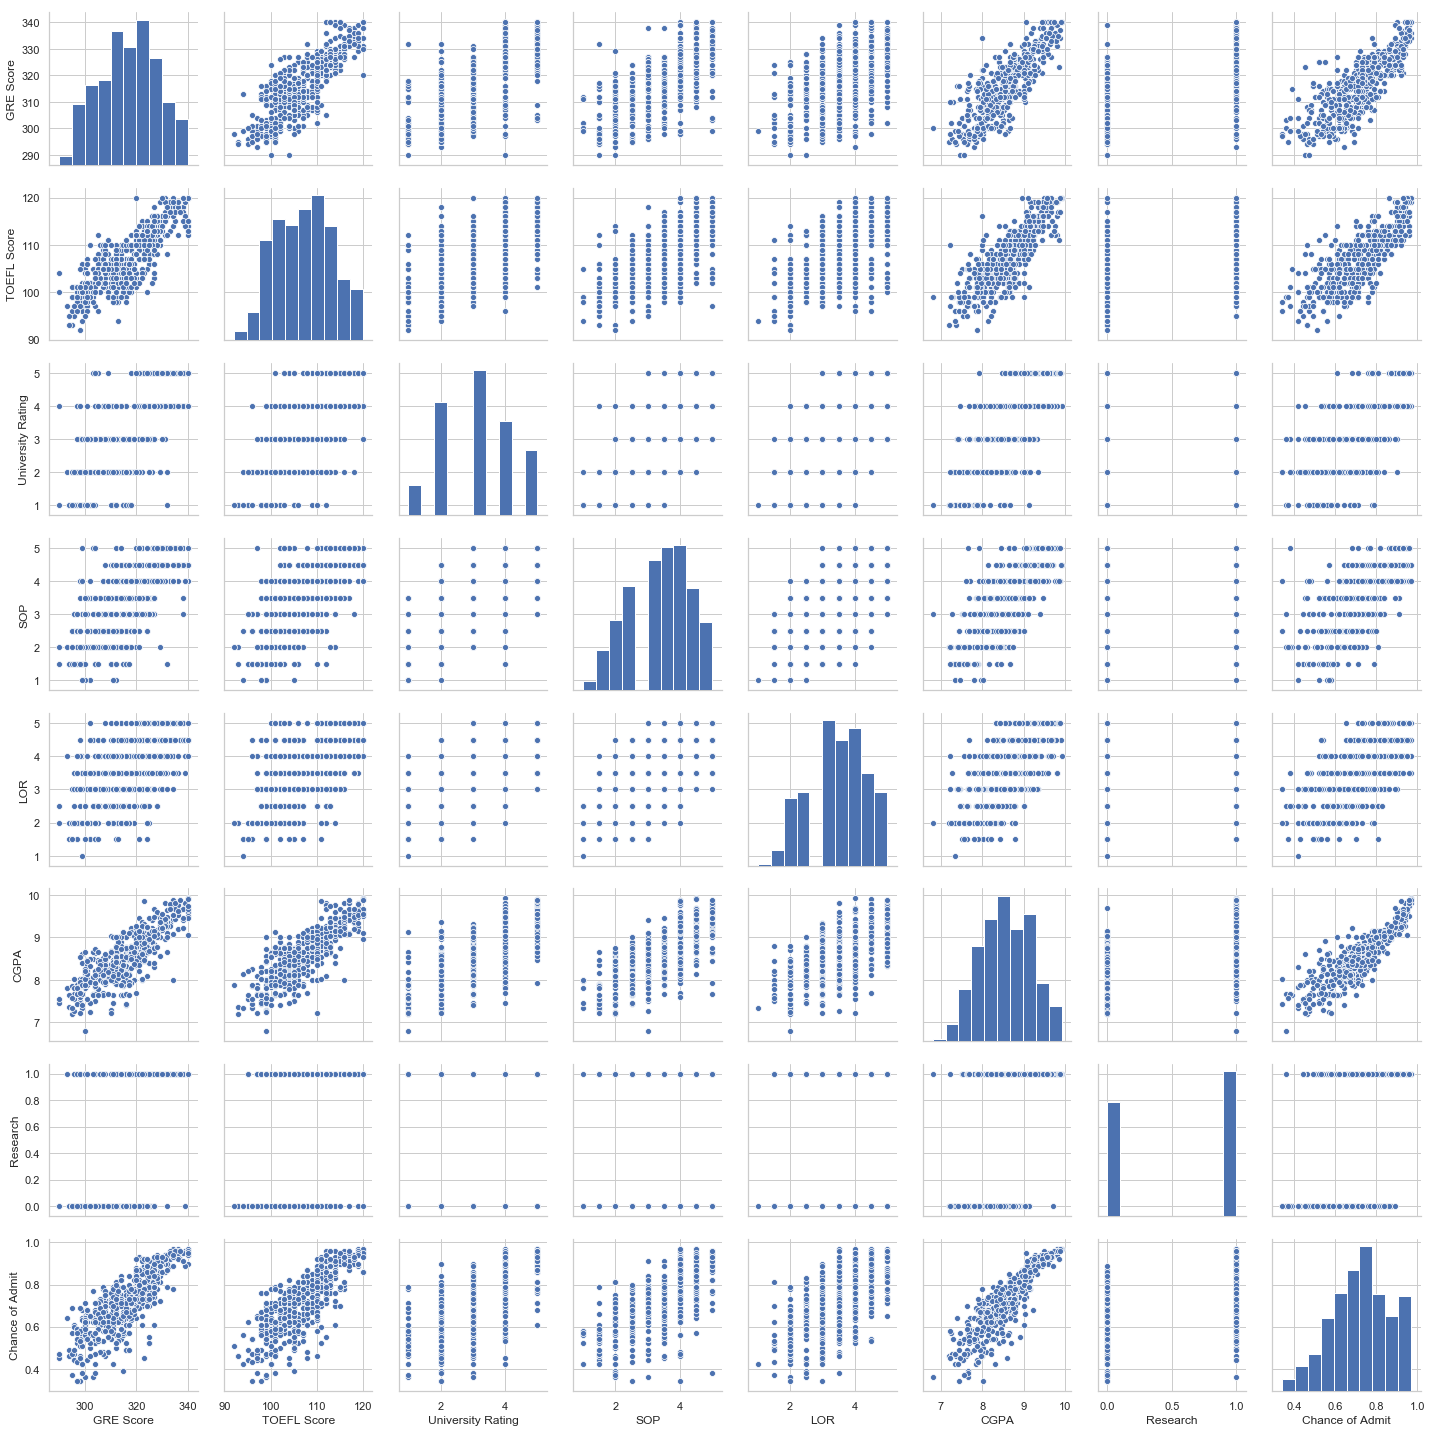

In [11]:
pairplt = sns.pairplot(adf)

#### 4.4. We can examine these features more closely by specifying them specifically:

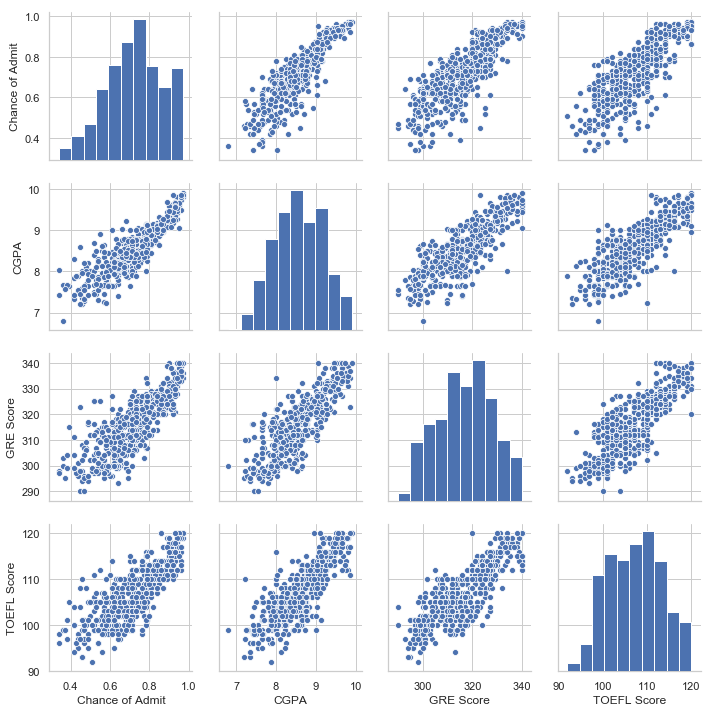

In [12]:
pairplt = sns.pairplot(adf, vars=['Chance of Admit','CGPA','GRE Score','TOEFL Score'])

#### 4.5 Now that we have a preliminary idea of which features to focus on, lets go ahead and confirm this with a heatmap using the Seaborn package:

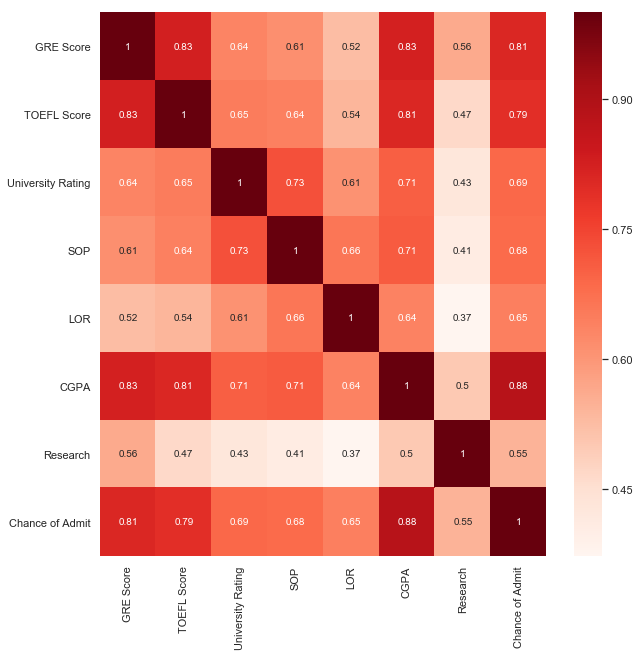

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(adf.corr(), annot=True, cmap= 'Reds')

#### Looking at the last row (Chance of Admit) we can quickly identify that the top three features that have a significant impact are (1) CGPA, (2) GRE Score, and (3) TOEFL Score. Notice that the lowest two are the LOR and SOP. Perhaps I should not have spent as much time on those during my applications...

#### 4.6 Lets take a closer look at these three highly correlated features by plotting them using Seaborn's regplot() function:

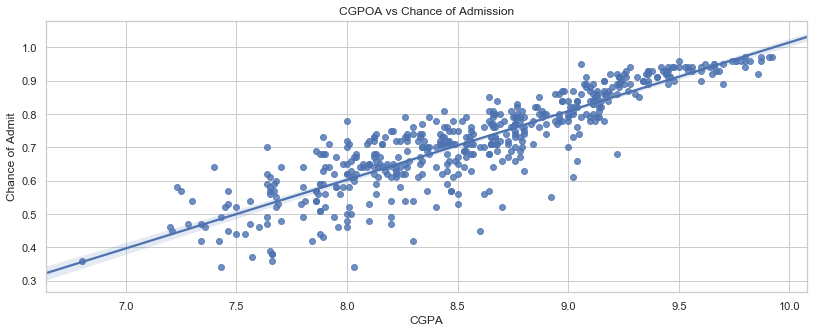

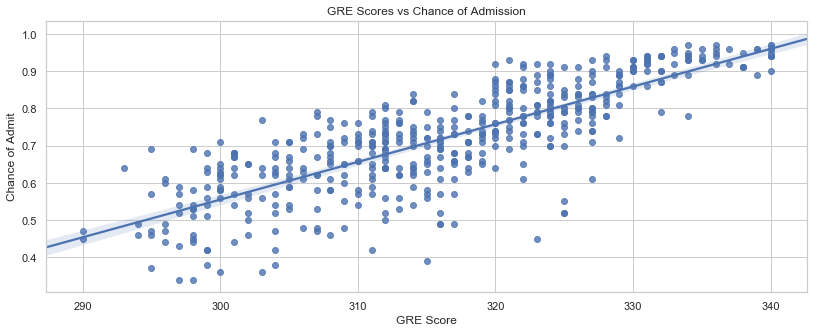

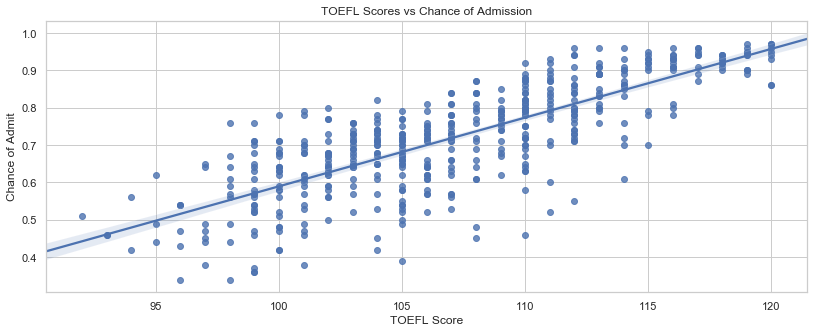

In [34]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
sns.regplot(adf['CGPA'], adf['Chance of Admit'])
plt.title('CGPOA vs Chance of Admission')

plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
sns.regplot(adf['GRE Score'], adf['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admission')

plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
sns.regplot(adf['TOEFL Score'], adf['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admission');

### 5. Preprocessing Our Data:

#### 5.1. Now that we have a better understanding of our data and the features which govern it, lets go ahead and preprocess our data in order to prepare it for a few machine learning algorithms. We begin by splitting our data into training (75%) and testing (25%) datasets - the latter of which we will ignore for now and use to test the accuracy of our models.

In [42]:
from sklearn.model_selection import train_test_split

adf_target = adf['Chance of Admit']
adf_features = adf.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(adf_features, adf_target, test_size=0.25, random_state=40)

#### 5.2. Datasets contain features that vary highly in magnitude. A value value for a GRE Score (335) cannot be adequtely compared to a value from CGPA (3.12). Machine learning algorithms use the Euclidean distance between data points, therefore, we will begin by scaling our data from 0 to 1 in order to improve our accuracy.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\salkhali\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\salkhali\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\salkhali\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\salkhali\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 6. Building our Machine Learning Algorithms

#### In this section, we will examine two main ML algorithms (1) Decision Trees, and (2) Logistic Regression.

#### 6.1. Let us begin with our decision tree algorithm. Decision Trees are commonly used for classification problems, and not regression. Since our objective is to determine the chances of admission, we will need to rethink how we will answer this question. We can either create 'buckets' of admissions rates (0-0.1, 0.1-0.2, etc...), or we can change our model to a YES/NO algorithm. We will begin by transforming this model to a binary classification model in which we determine whether or not an applicant will have a 72% chance of admission.

In [99]:
y_train_binary = (y_train > 0.72).astype(int)

y_test_binary = (y_test > 0.72).astype(int)

In [100]:
from sklearn.tree import DecisionTreeClassifier


adf_tree = DecisionTreeClassifier(random_state=0, max_depth=7)
adf_tree.fit(X_train, y_train_binary)

adf_tree_y_predict = adf_tree.predict(X_test)

decision_tree_score = (adf_tree.score(X_test, y_test_binary))*100

print("Decision Tree: ", end=" ")
print(decision_tree_score, end=" ")
print("% Accuracy")

Decision Tree:  87.2 % Accuracy


#### 6.2. We were able to design a decision tree algorithm with an accuracy of 85.6%. This is fantastic, however, there remains one detail to examine a little further: max_depth. We assigned a value of 7 here as the maximum depth of our model. We would need to ensure that we are not underfitting or overfitting our model with this parameter. We can check this by changing the value and noting the change in accuracy.

#### max_depth=5, Accuracy = 88.0%
#### max_depth=6, Accuracy = 88.8%
#### max_depth=7, Accuracy = 85.6%
#### max_depth=8, Accuracy = 84.8%

#### 6.3. Since a max_depth of 6 seems to show the highest accuracy, we can go ahead and use that in our model:

In [101]:
adf_tree = DecisionTreeClassifier(random_state=0, max_depth=6)
adf_tree.fit(X_train, y_train_binary)

adf_tree_y_predict = adf_tree.predict(X_test)

decision_tree_score = (adf_tree.score(X_test, y_test_binary))*100

print("Decision Tree: ", end=" ")
print(decision_tree_score, end=" ")
print("% Accuracy")

Decision Tree:  88.8 % Accuracy


#### 6.4. Next, we will examine Logistic Regression. 

In [102]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train_binary)

adf_log_y_predict = logreg.predict(X_test)

logreg_score = (logreg.score(X_test, y_test_binary))*100

print("Logistic Regression: ", end=" ")
print(logreg_score, end=" ")
print("% Accuracy")

Logistic Regression:  90.4 % Accuracy


C:\Users\salkhali\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 7. Conclusion:

#### Let us recap. First, we examined oour data and identified the datatypes, general statistics, and completeness of our dataset. Second, we examined the trends within our data and identified the most and least important features. Finally, we built two excellent ML algorithms, trained them, and then tested them for their accuracies. The first gave an accuracy of 88.8% whereas the second, the Logistic Regression, produced an accuracy of 90.4%. Although the two numbers are not the same, they are very closely realted indicating that both algorithms can be trusted until otherwise disproven